In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from polynomial_regression import polynomial_regression

In [2]:
class homework2(polynomial_regression):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def _mserror(self, X, y_real):
        #рассчёт среднеквадратичной ошибки
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0] + np.sqrt(np.linalg.norm(self.w)**2+(self.w0)**2)
    def _mserror_grad(self, X, y_real):
        #рассчёт градиента ошибки.
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #np.sum(2*delta)/y_real.shape[0] - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return 2*delta.T.dot(X)/y_real.shape[0] + (2*self.w + 2*self.w0), \
                    np.sum(2*delta)/y_real.shape[0] + 2*self.w0

In [3]:
polynomial_regression.generate_features(np.array([1, 2, 3, 4]), 4)

array([[  1,   1,   1,   1],
       [  2,   4,   8,  16],
       [  3,   9,  27,  81],
       [  4,  16,  64, 256]])

In [4]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [5]:
dots = np.linspace(-10, 10, 100)

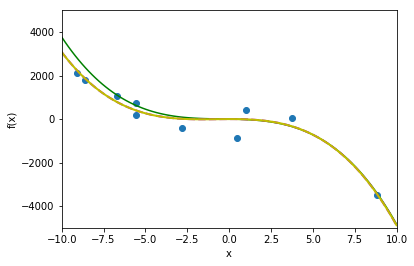

In [6]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Модель ДЗ с регуляризацией
hw2_mod=homework2(3)
hw2_mod.fit(x_data, f_data)
plt.plot(dots, hw2_mod.predict(dots), 'm--', linewidth=2)

#Обычная полиноминальная модель
poly_mod=polynomial_regression(3)
poly_mod.fit(x_data, f_data)
plt.plot(dots, poly_mod.predict(dots), '-y', linewidth=2);

In [7]:
hw2_mod.test(x_data, f_data)

147820.9600066186

In [8]:
poly_mod.test(x_data, f_data)

147809.28711225485